In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### TASK 1 - preprocessing

Reading the csv files for USNW datset

In [3]:
#function to read and concatenate the datasets of UNSW
def append_datasets(path):
    df_chunk = pd.read_csv(path, chunksize=1000, header = None)
    chunk_list = []  # append each chunk df here 

    # Each chunk is in df format
    for chunk in df_chunk:  
        # perform data filtering 


        # Once the data filtering is done, append the chunk to list
        chunk_list.append(chunk)

    # concat the list into dataframe 
    info = pd.concat(chunk_list)
    return info

Add a shortcut of the dataset folder shared with us to your drive and then copy paste the path if the below cells don't work in accessing the file

In [4]:
lis_UNSW=[r'/content/drive/MyDrive/IDS Asignment Datasets/unsw-nb15/UNSW-NB15_3.csv', r'/content/drive/MyDrive/IDS Asignment Datasets/unsw-nb15/UNSW-NB15_4.csv']
df_UNSW=pd.DataFrame()
for x in lis_UNSW:
    df_UNSW=pd.concat([df_UNSW,append_datasets(x)])

Reading the csv files for CSIDS datset

In [5]:
#Reading the csv files for IDS17 dataset
df1=pd.read_csv("/content/drive/MyDrive/IDS Asignment Datasets/cicids2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/MyDrive/IDS Asignment Datasets/cicids2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/IDS Asignment Datasets/cicids2017/Friday-WorkingHours-Morning.pcap_ISCX.csv")

df_CSIDS = pd.concat([df1,df2])
del df1,df2
df_CSIDS = pd.concat([df_CSIDS,df3])
del df3

df_CSIDS

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


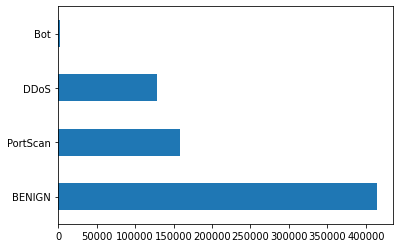

In [6]:
df_CSIDS[' Label'].value_counts().plot(kind='barh')

In [7]:
df_UNSW.reset_index(inplace = True)
df_UNSW.drop('index',axis=1,inplace=True)

headers_df=pd.read_csv('/content/drive/MyDrive/IDS Asignment Datasets/unsw-nb15/NUSW-NB15_features.csv',encoding='cp1252')
headers_list=headers_df['Name'].to_list()
df_UNSW.columns =headers_list
df_UNSW

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140040,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
1140041,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
1140042,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
1140043,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


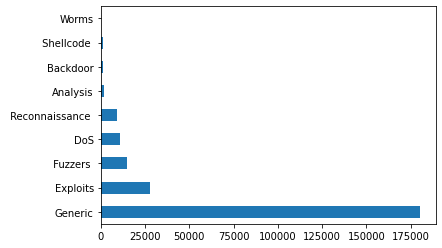

In [8]:
df_UNSW['attack_cat'].value_counts().plot(kind='barh')

Dropping columns like sorce ip, destination ip, source port, destination port

In [ ]:
df_UNSW.drop(["srcip","sport","dstip","dsport"],axis=1,inplace=True)
df_CSIDS.drop([" Destination Port"],axis=1,inplace=True)

Replacing BENIGN with 0 and remianing else with 1

In [ ]:
df_CSIDS[" Label"] = np.where(df_CSIDS[" Label"] == "BENIGN", 0, 1)
df_CSIDS[" Label"].unique()

array([0, 1])

In [ ]:
df_UNSW["Label"].unique()

array([0, 1])

Extra pre processing on UNSW dataset to make it suitable for training

In [ ]:
df_UNSW['attack_cat'] = df_UNSW['attack_cat'].fillna('BENIGN')

df_UNSW['proto']=df_UNSW['proto'].astype(str)
df_UNSW['state']=df_UNSW['state'].astype(str)
df_UNSW['service']=df_UNSW['service'].astype(str)
df_UNSW['ct_ftp_cmd']=df_UNSW['ct_ftp_cmd'].astype(str)
df_UNSW['attack_cat']=df_UNSW['attack_cat'].astype(str)


df_UNSW

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,tcp,FIN,0.119596,4550,68342,31,29,7,33,-,...,,6,2,2,5,1,1,2,BENIGN,0
1,tcp,FIN,0.650574,8928,320,31,29,4,1,ftp-data,...,,3,5,2,4,1,1,4,BENIGN,0
2,tcp,FIN,0.007980,2158,2464,31,29,6,6,-,...,,3,5,1,1,1,1,3,BENIGN,0
3,udp,INT,0.000005,264,0,60,0,0,0,dns,...,,19,19,19,19,19,19,19,BENIGN,0
4,udp,INT,0.000005,264,0,60,0,0,0,dns,...,,19,19,19,19,19,19,19,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140040,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,...,,1,2,3,3,1,1,3,BENIGN,0
1140041,tcp,CON,0.365058,456,346,31,29,2,2,ftp,...,2,2,2,2,2,2,2,2,BENIGN,0
1140042,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,...,2,2,2,4,2,2,2,2,BENIGN,0
1140043,tcp,CON,2.200934,3498,166054,31,29,2,57,http,...,,1,1,2,4,2,2,2,BENIGN,0


Extra pre processing on CSIDS dataset to make it suitable for training

In [ ]:
for i in df_CSIDS.columns:
    df_CSIDS = df_CSIDS[df_CSIDS[i] != "Infinity"]
    df_CSIDS = df_CSIDS[df_CSIDS[i] != np.nan]
    df_CSIDS = df_CSIDS[df_CSIDS[i] != ",,"]
df_CSIDS[['Flow Bytes/s', ' Flow Packets/s']] = df_CSIDS[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric)
df_CSIDS.replace([np.inf, -np.inf, -np.nan, np.nan], 0, inplace=True) 

Drop the columns with more thn 25% null values

In [ ]:
df_CSIDS.isnull().sum()

 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
                               ..
Idle Mean                       0
 Idle Std                       0
 Idle Max                       0
 Idle Min                       0
 Label                          0
Length: 78, dtype: int64

In [ ]:
df_UNSW.isnull().sum()

proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports           0
ct_state_ttl              0
ct_flw_http_mthd    1062889
is_ftp_login        1122841
ct_ftp_cmd          

In [ ]:
perc = 25.0 # Like N %

#UNSW dataset
min_count =  int(((100-perc)/100)*df_UNSW.shape[0] + 1)  
df_UNSW = df_UNSW.dropna( axis=1,thresh=min_count)

#CSIDS dataset
min_count =  int(((100-perc)/100)*df_CSIDS.shape[0] + 1)
df_CSIDS = df_CSIDS.dropna( axis=1,thresh=min_count)


In [ ]:
df_UNSW

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,tcp,FIN,0.119596,4550,68342,31,29,7,33,-,...,,6,2,2,5,1,1,2,BENIGN,0
1,tcp,FIN,0.650574,8928,320,31,29,4,1,ftp-data,...,,3,5,2,4,1,1,4,BENIGN,0
2,tcp,FIN,0.007980,2158,2464,31,29,6,6,-,...,,3,5,1,1,1,1,3,BENIGN,0
3,udp,INT,0.000005,264,0,60,0,0,0,dns,...,,19,19,19,19,19,19,19,BENIGN,0
4,udp,INT,0.000005,264,0,60,0,0,0,dns,...,,19,19,19,19,19,19,19,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140040,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,...,,1,2,3,3,1,1,3,BENIGN,0
1140041,tcp,CON,0.365058,456,346,31,29,2,2,ftp,...,2,2,2,2,2,2,2,2,BENIGN,0
1140042,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,...,2,2,2,4,2,2,2,2,BENIGN,0
1140043,tcp,CON,2.200934,3498,166054,31,29,2,57,http,...,,1,1,2,4,2,2,2,BENIGN,0


In [ ]:
df_CSIDS

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,61452,4,2,180,354,45,45,45.0,0.0,177,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
191029,171,2,2,80,272,40,40,40.0,0.0,136,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
191030,222,2,2,90,354,45,45,45.0,0.0,177,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
191031,16842,1,1,48,48,48,48,48.0,0.0,48,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


Label encoding the categorical columns

In [ ]:
# attack_cat,ct_ftp_cmd,service,state,proto
label_encoder = preprocessing.LabelEncoder()
df_UNSW['proto']= label_encoder.fit_transform(df_UNSW['proto'])
df_UNSW['attack_cat']= label_encoder.fit_transform(df_UNSW['attack_cat'])
df_UNSW['ct_ftp_cmd']= label_encoder.fit_transform(df_UNSW['ct_ftp_cmd'])
df_UNSW['service']= label_encoder.fit_transform(df_UNSW['service'])
df_UNSW['state']= label_encoder.fit_transform(df_UNSW['state'])

# no object columns in CSIDS17 datset

/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/ipykernel_launcher

Drop duplicate rows from both the dataframes

In [ ]:
df_UNSW=df_UNSW.drop_duplicates()
df_UNSW

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,113,4,0.119596,4550,68342,31,29,7,33,0,...,0,6,2,2,5,1,1,2,4,0
1,113,4,0.650574,8928,320,31,29,4,1,4,...,0,3,5,2,4,1,1,4,4,0
2,113,4,0.007980,2158,2464,31,29,6,6,0,...,0,3,5,1,1,1,1,3,4,0
3,119,5,0.000005,264,0,60,0,0,0,2,...,0,19,19,19,19,19,19,19,4,0
5,113,4,0.486578,37462,3380,31,29,18,8,9,...,0,3,2,3,4,2,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140037,113,1,0.564998,14106,772406,31,29,2,262,5,...,0,1,1,4,2,2,2,2,4,0
1140039,113,1,0.564998,14106,772406,31,29,2,262,0,...,0,2,1,4,2,2,2,2,4,0
1140040,113,4,0.087306,320,1828,31,29,1,2,4,...,0,1,2,3,3,1,1,3,4,0
1140043,113,1,2.200934,3498,166054,31,29,2,57,5,...,0,1,1,2,4,2,2,2,4,0


In [ ]:
df_CSIDS=df_CSIDS.drop_duplicates()
df_CSIDS

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,61452,4,2,180,354,45,45,45.0,0.0,177,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
191029,171,2,2,80,272,40,40,40.0,0.0,136,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
191030,222,2,2,90,354,45,45,45.0,0.0,177,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
191031,16842,1,1,48,48,48,48,48.0,0.0,48,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


Sperate the datasets into X and Y (features and labels)

In [ ]:
Y_UNSW=df_UNSW["Label"]
X_UNSW=df_UNSW.drop("Label",axis=1) 

Y_CSIDS=df_CSIDS[" Label"]
X_CSIDS=df_CSIDS.drop(" Label",axis=1)

Split the datasets into train and test

In [ ]:
X_train_UNSW, X_test_UNSW, Y_train_UNSW, Y_test_UNSW = train_test_split(
     X_UNSW, Y_UNSW, test_size=0.30, random_state=42,stratify=Y_UNSW)

X_train_CSIDS, X_test_CSIDS, Y_train_CSIDS, Y_test_CSIDS = train_test_split(
     X_CSIDS, Y_CSIDS, test_size=0.30, random_state=42, stratify=Y_CSIDS
)

Min-max scaler to normalize the datasets

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_UNSW)
X_UNSW_scaled_train = scaler.transform(X_train_UNSW)
X_UNSW_scaled_test = scaler.transform(X_test_UNSW)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_CSIDS)
X_CSIDS_scaled_train = scaler.transform(X_train_CSIDS)
X_CSIDS_scaled_test = scaler.transform(X_test_CSIDS)

###  TASK 2 : Feature selection - SelectKBest method with chi-square - UNSW

In [ ]:
import copy
k=[40,30,25]
UNSW_dict=dict(zip(k, ([] for _ in k)))
roc_auc_UNSW=dict(zip(k, ([] for _ in k)))
for i in k:
  chi2_features = SelectKBest(chi2, k = i)
  chi2_features.fit(X_UNSW_scaled_train,Y_train_UNSW)
  UNSW_dict[i].append(chi2_features.transform(X_UNSW_scaled_train))
  UNSW_dict[i].append(chi2_features.transform(X_UNSW_scaled_test))
UNSW_dict_copy=copy.deepcopy(UNSW_dict)
Y_train_UNSW_copy = Y_train_UNSW.copy()
UNSW_dict_copy1=copy.deepcopy(UNSW_dict)
Y_train_UNSW_copy1 = Y_train_UNSW.copy()

### Feature selection - SelectKBest method with chi-square - CSIDS

In [ ]:
k=[70,60,50]
CSIDS_dict=dict(zip(k, ([] for _ in k)))
roc_auc_CSIDS=dict(zip(k, ([] for _ in k)))
for i in k:
  chi2_features = SelectKBest(chi2, k = i)
  chi2_features.fit(X_CSIDS_scaled_train,Y_train_CSIDS)
  CSIDS_dict[i].append(chi2_features.transform(X_CSIDS_scaled_train))
  CSIDS_dict[i].append(chi2_features.transform(X_CSIDS_scaled_test))
CSIDS_dict_copy=copy.deepcopy(CSIDS_dict)
Y_train_CSIDS_copy = Y_train_CSIDS.copy()
CSIDS_dict_copy1=copy.deepcopy(CSIDS_dict)
Y_train_CSIDS_copy1 = Y_train_CSIDS.copy()

### BONUS - Feature selection with PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

X_train_pca_UNSW = pca.fit_transform(X_UNSW_scaled_train)
Y_train_pca_UNSW_copy = Y_train_UNSW.copy()
X_test_pca_UNSW = pca.transform(X_UNSW_scaled_test)

pca=PCA()

X_train_pca_CSIDS = pca.fit_transform(X_CSIDS_scaled_train)
Y_train_pca_CSIDS_copy = Y_train_CSIDS.copy()
X_test_pca_CSIDS = pca.transform(X_CSIDS_scaled_test)

# The models on these datasets and the ROC curve are in the end of this notebook

Text(0, 0.5, 'Second Principal Component')

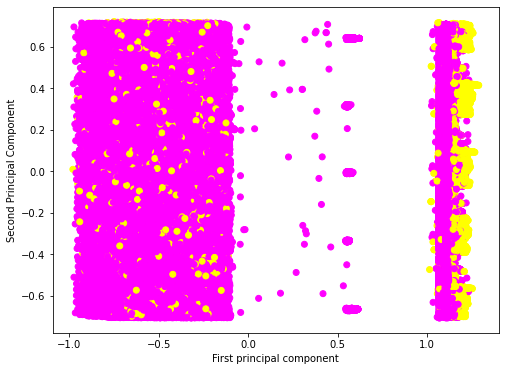

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_UNSW[:,0],X_train_pca_UNSW[:,1],c=Y_train_UNSW,cmap='spring')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

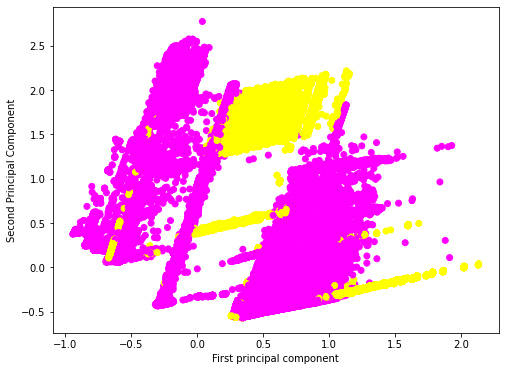

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_CSIDS[:,0],X_train_pca_CSIDS[:,1],c=Y_train_CSIDS,cmap='spring')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


### Trying different models 

#### Gaussian Naive Bayes

In [ ]:
model = GaussianNB()  
for key,val in UNSW_dict.items():
  print(f"fitting the model Gaussian Naive Bayes for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 40 features
confusion matrix and classification report
[[201881  13077]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    214958
           1       0.60      1.00      0.75     19318

    accuracy                           0.94    234276
   macro avg       0.80      0.97      0.86    234276
weighted avg       0.97      0.94      0.95    234276

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 30 features
confusion matrix and classification report
[[203775  11183]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    214958
           1       0.63      1.00      0.78     19318

    accuracy                           0.95    234276
   macro avg       0.82      0.97      0.87    234276
weighted avg       0.97      0.95      0.96    234276

fitting the model Gaussian Naive Bay

In [ ]:
model = GaussianNB()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model Gaussian Naive Bayes for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[89121 23657]
 [  223 39202]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    112778
           1       0.62      0.99      0.77     39425

    accuracy                           0.84    152203
   macro avg       0.81      0.89      0.82    152203
weighted avg       0.90      0.84      0.85    152203

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[93442 19336]
 [  405 39020]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    112778
           1       0.67      0.99      0.80     39425

    accuracy                           0.87    152203
   macro avg       0.83      0.91      0.85    152203
weighted avg       0.91      0.87      0.88    152203

fitting the model Gaussian Naive Bayes for

#### Logistic Regression

In [ ]:
model=LogisticRegression()
for key,val in UNSW_dict.items():
  print(f"fitting the model Logistic Regression for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Logistic Regression for UNSW dataset with k = 40 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[211906   3052]
 [  1251  18067]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.86      0.94      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.92      0.96      0.94    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 30 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[211923   3035]
 [  1242  18076]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.86      0.94      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.93      0.96      0.94    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 25 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209886   5072]
 [  1102  18216]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    214958
           1       0.78      0.94      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.89      0.96      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = LogisticRegression()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model LogisticRegression for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LogisticRegression for CSIDS dataset with k = 70 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[109359   3419]
 [  1027  38398]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    112778
           1       0.92      0.97      0.95     39425

    accuracy                           0.97    152203
   macro avg       0.95      0.97      0.96    152203
weighted avg       0.97      0.97      0.97    152203

fitting the model LogisticRegression for CSIDS dataset with k = 60 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[109395   3383]
 [  1032  38393]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    112778
           1       0.92      0.97      0.95     39425

    accuracy                           0.97    152203
   macro avg       0.95      0.97      0.96    152203
weighted avg       0.97      0.97      0.97    152203

fitting the model LogisticRegression for CSIDS dataset with k = 50 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[109361   3417]
 [  1027  38398]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    112778
           1       0.92      0.97      0.95     39425

    accuracy                           0.97    152203
   macro avg       0.95      0.97      0.96    152203
weighted avg       0.97      0.97      0.97    152203



#### Random Forest

In [ ]:
model=RandomForestClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model RandomForestClassifier for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model RandomForestClassifier for UNSW dataset with k = 40 features
confusion matrix and classification report
[[214956      2]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model RandomForestClassifier for UNSW dataset with k = 30 features
confusion matrix and classification report
[[214957      1]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model RandomForestCl

In [ ]:
model = RandomForestClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model RandomForestClassifier for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred =model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model RandomForestClassifier for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[112710     68]
 [   178  39247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model RandomForestClassifier for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[112713     65]
 [   181  39244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model RandomForest

### XGBoost

In [ ]:
model=XGBClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model XGBClassifier for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model XGBClassifier for UNSW dataset with k = 40 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 30 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 25 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = XGBClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model XGBClassifier for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model XGBClassifier for CSIDS dataset with k = 70 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112701     77]
 [   118  39307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 60 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112711     67]
 [   132  39293]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 50 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112708     70]
 [   115  39310]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



### AdaBoost Classifier

In [ ]:
model=AdaBoostClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model AdaBoostClassifier for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model AdaBoostClassifier for UNSW dataset with k = 40 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model AdaBoostClassifier for UNSW dataset with k = 30 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model AdaBoostClassifier for

In [ ]:
model = AdaBoostClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model AdaBoostClassifier for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS) 
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model AdaBoostClassifier for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[112723     55]
 [   346  39079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model AdaBoostClassifier for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[112712     66]
 [   310  39115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      0.99      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model AdaBoostClassifier f

### MLP classifier

In [ ]:
model=MLPClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model MLPClassifier for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model MLPClassifier for UNSW dataset with k = 40 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model MLPClassifier for UNSW dataset with k = 30 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model MLPClassifier for UNSW dataset w

In [ ]:
model = MLPClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model MLPClassifier for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model MLPClassifier for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[112677    101]
 [   513  38912]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       1.00      0.99      0.99    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model MLPClassifier for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[112596    182]
 [   269  39156]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model MLPClassifier for CSIDS datase

### Linear SVC

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in UNSW_dict.items():
  print(f"fitting the model SVM for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model SVM for UNSW dataset with k = 40 features
confusion matrix and classification report
[[212102   2856]
 [  1483  17835]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.86      0.92      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.93      0.95      0.94    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model SVM for UNSW dataset with k = 30 features
confusion matrix and classification report
[[212411   2547]
 [  1714  17604]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.87      0.91      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.93      0.95      0.94    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model SVM for UNSW dataset with k = 25 features
confusion 

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in CSIDS_dict.items():
  print(f"fitting the model SVM for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model SVM for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[110350   2428]
 [  1037  38388]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    112778
           1       0.94      0.97      0.96     39425

    accuracy                           0.98    152203
   macro avg       0.97      0.98      0.97    152203
weighted avg       0.98      0.98      0.98    152203

fitting the model SVM for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[110348   2430]
 [  1037  38388]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    112778
           1       0.94      0.97      0.96     39425

    accuracy                           0.98    152203
   macro avg       0.97      0.98      0.97    152203
weighted avg       0.98      0.98      0.98    152203

fitting the model SVM for CSIDS dataset with k = 50 features
confusi

### Decision Tree ID3

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in UNSW_dict.items():
  print(f"fitting the model Id3Estimator for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Id3Estimator for UNSW dataset with k = 40 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model Id3Estimator for UNSW dataset with k = 30 features
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model Id3Estimator for UNSW dataset with

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in CSIDS_dict.items():
  print(f"fitting the model Id3Estimator for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Id3Estimator for CSIDS dataset with k = 70 features
confusion matrix and classification report
[[112671    107]
 [   109  39316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model Id3Estimator for CSIDS dataset with k = 60 features
confusion matrix and classification report
[[112669    109]
 [   108  39317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model Id3Estimator for CSIDS dataset w

### Voting Classifier

In [ ]:
clf1=GaussianNB()
clf2 = LogisticRegression()
clf=LinearSVC()
clf3 = CalibratedClassifierCV(clf) 

model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in UNSW_dict.items():
  print(f"fitting the model voting classifier for UNSW dataset with k = {key} features")
  model.fit(val[0],Y_train_UNSW)
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model voting classifier for UNSW dataset with k = 40 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209486   5472]
 [   245  19073]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.78      0.99      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model voting classifier for UNSW dataset with k = 30 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209641   5317]
 [   309  19009]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    214958
           1       0.78      0.98      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model voting classifier for UNSW dataset with k = 25 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209231   5727]
 [   173  19145]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      0.99      0.87     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.98      0.93    234276
weighted avg       0.98      0.97      0.98    234276



In [ ]:
model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in CSIDS_dict.items():
  print(f"fitting the model voting classifier for CSIDS dataset with k = {key} features")
  model.fit(val[0],Y_train_CSIDS)
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model voting classifier for CSIDS dataset with k = 70 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106651   6127]
 [   938  38487]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.86      0.98      0.92     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.95    152203

fitting the model voting classifier for CSIDS dataset with k = 60 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106757   6021]
 [   940  38485]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.86      0.98      0.92     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.96    152203

fitting the model voting classifier for CSIDS dataset with k = 50 features


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106752   6026]
 [   944  38481]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.86      0.98      0.92     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.96    152203



### ROC - AUC CURVE

UNSW dataset

The ROC-AUC curve for UNSW dataset for k = 40 features


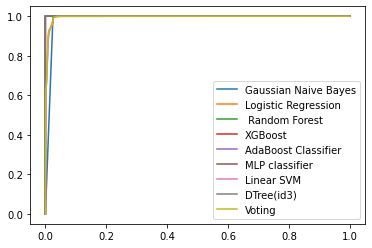

The ROC-AUC curve for UNSW dataset for k = 30 features


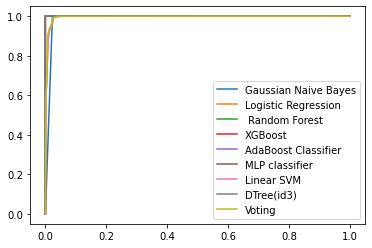

The ROC-AUC curve for UNSW dataset for k = 25 features


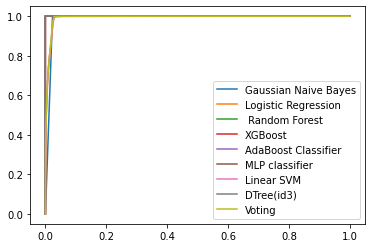

In [ ]:
k=[40,30,25]
for j in k:
  print(f"The ROC-AUC curve for UNSW dataset for k = {j} features")
  temp_list=roc_auc_UNSW[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

#### CSIDS dataset

The ROC-AUC curve for CSIDS dataset for k = 70 features


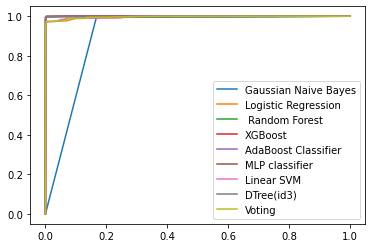

The ROC-AUC curve for CSIDS dataset for k = 60 features


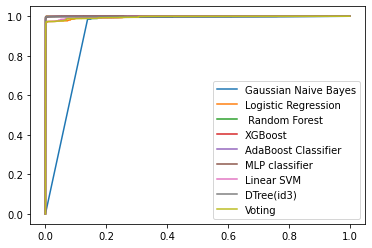

The ROC-AUC curve for CSIDS dataset for k = 50 features


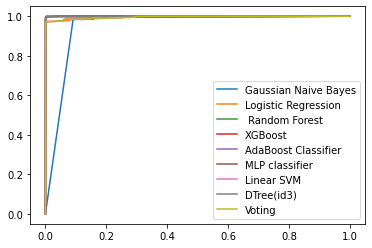

In [ ]:
k=[70,60,50]
for j in k:
  print(f"The ROC-AUC curve for CSIDS dataset for k = {j} features")
  temp_list=roc_auc_CSIDS[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

### TASK4 - Handling class imbalance 

UNSW dataset - class imbalance plot

<AxesSubplot:>

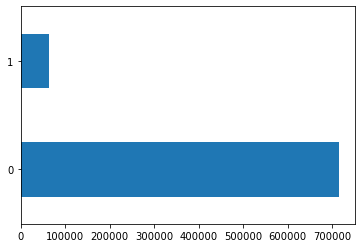

In [ ]:
df_UNSW['Label'].value_counts().plot(kind='barh')

CSIDS dataset - class imbalance plot

<AxesSubplot:>

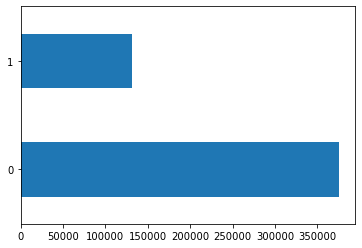

In [ ]:
df_CSIDS[' Label'].value_counts().plot(kind='barh')

### Random Oversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
for key,val in UNSW_dict.items():
  val[0],a=ros.fit_resample(val[0],Y_train_UNSW)
  val.append(a)

for key,val in CSIDS_dict.items():
  val[0],a=ros.fit_resample(val[0],Y_train_CSIDS)
  val.append(a)

k=[40,30,25]
roc_auc_UNSW=dict(zip(k, ([] for _ in k)))
k=[70,60,50]
roc_auc_CSIDS=dict(zip(k, ([] for _ in k)))

#### Gaussian Naive Bayes

In [ ]:
model = GaussianNB()  
for key,val in UNSW_dict.items():
  print(f"fitting the model Gaussian Naive Bayes for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[201864  13094]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    214958
           1       0.60      1.00      0.75     19318

    accuracy                           0.94    234276
   macro avg       0.80      0.97      0.86    234276
weighted avg       0.97      0.94      0.95    234276

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[203368  11590]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    214958
           1       0.63      1.00      0.77     19318

    accuracy                           0.95    234276
   macro avg       0.81      0.97      0.87    234276
weighted avg       0.97  

In [ ]:
model = GaussianNB()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model Gaussian Naive Bayes for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[89030 23748]
 [  222 39203]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    112778
           1       0.62      0.99      0.77     39425

    accuracy                           0.84    152203
   macro avg       0.81      0.89      0.82    152203
weighted avg       0.90      0.84      0.85    152203

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[93370 19408]
 [  400 39025]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    112778
           1       0.67      0.99      0.80     39425

    accuracy                           0.87    152203
   macro avg       0.83      0.91      0.85    152203
weighted avg       0.91      0.

#### Logistic Regression

In [ ]:
model=LogisticRegression()

for key,val in UNSW_dict.items():
  print(f"fitting the model Logistic Regression for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Logistic Regression for UNSW dataset with k = 40 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209358   5600]
 [    87  19231]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 30 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209261   5697]
 [    96  19222]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 25 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208291   6667]
 [    28  19290]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.74      1.00      0.85     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = LogisticRegression()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model LogisticRegression for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LogisticRegression for CSIDS dataset with k = 70 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[108003   4775]
 [   915  38510]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    112778
           1       0.89      0.98      0.93     39425

    accuracy                           0.96    152203
   macro avg       0.94      0.97      0.95    152203
weighted avg       0.97      0.96      0.96    152203

fitting the model LogisticRegression for CSIDS dataset with k = 60 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[107278   5500]
 [   902  38523]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.88      0.98      0.92     39425

    accuracy                           0.96    152203
   macro avg       0.93      0.96      0.95    152203
weighted avg       0.96      0.96      0.96    152203

fitting the model LogisticRegression for CSIDS dataset with k = 50 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[107719   5059]
 [   902  38523]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    112778
           1       0.88      0.98      0.93     39425

    accuracy                           0.96    152203
   macro avg       0.94      0.97      0.95    152203
weighted avg       0.96      0.96      0.96    152203



#### RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model RandomForestClassifier for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model RandomForestClassifier for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[214956      2]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model RandomForestClassifier for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.

In [ ]:
model = RandomForestClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model RandomForestClassifier for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model RandomForestClassifier for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[112671    107]
 [   148  39277]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model RandomForestClassifier for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[112683     95]
 [   144  39281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       

#### XGBClassifier

In [ ]:
model=XGBClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model XGBClassifier for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model XGBClassifier for UNSW dataset with k = 40 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214957      1]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 30 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214956      2]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 25 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214957      1]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = XGBClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model XGBClassifier for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model XGBClassifier for CSIDS dataset with k = 70 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112654    124]
 [    87  39338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 60 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112652    126]
 [    81  39344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 50 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112642    136]
 [    80  39345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



#### AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model AdaBoostClassifier for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))  
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model AdaBoostClassifier for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model AdaBoostClassifier for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      

In [ ]:
model = AdaBoostClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model AdaBoostClassifier for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model AdaBoostClassifier for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[112406    372]
 [   142  39283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model AdaBoostClassifier for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[112389    389]
 [   123  39302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      1.00    152203
weighted avg       1.00    

#### MLPClassifier

In [ ]:
model=MLPClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model MLPClassifier for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model MLPClassifier for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model MLPClassifier for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      

In [ ]:
model = MLPClassifier()  
for key,val in CSIDS_dict.items():
  print(f"fitting the model MLPClassifier for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model MLPClassifier for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[112360    418]
 [   258  39167]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      0.99      0.99    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model MLPClassifier for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[112328    450]
 [   103  39322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      1.00    152203
weighted avg       1.00      1.00    

#### Linear SVC

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in UNSW_dict.items():
  print(f"fitting the model SVM for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model SVM for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[208847   6111]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.76      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.99      0.92    234276
weighted avg       0.98      0.97      0.98    234276

fitting the model SVM for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[208983   5975]
 [    41  19277]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.76      1.00      0.87     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.99      0.93    234276
weighted avg       0.98      0.97      0.98    234276

fitt

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in CSIDS_dict.items():
  print(f"fitting the model SVM for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model SVM for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[105045   7733]
 [   408  39017]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    112778
           1       0.83      0.99      0.91     39425

    accuracy                           0.95    152203
   macro avg       0.92      0.96      0.93    152203
weighted avg       0.95      0.95      0.95    152203

fitting the model SVM for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[105051   7727]
 [   408  39017]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    112778
           1       0.83      0.99      0.91     39425

    accuracy                           0.95    152203
   macro avg       0.92      0.96      0.93    152203
weighted avg       0.95      0.95      0.95    152203

fi

#### Decision Tree ID3

In [ ]:
model=DecisionTreeClassifier()
for key,val in UNSW_dict.items():
  print(f"fitting the model Id3Estimator for UNSW dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Id3Estimator for UNSW dataset with k = 40 features after applying RandomOverSampler
confusion matrix and classification report
[[214954      4]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model Id3Estimator for UNSW dataset with k = 30 features after applying RandomOverSampler
confusion matrix and classification report
[[214953      5]
 [     5  19313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.

In [ ]:
model=DecisionTreeClassifier()
for key,val in CSIDS_dict.items():
  print(f"fitting the model Id3Estimator for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Id3Estimator for CSIDS dataset with k = 70 features after applying RandomOverSampler
confusion matrix and classification report
[[112655    123]
 [   118  39307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model Id3Estimator for CSIDS dataset with k = 60 features after applying RandomOverSampler
confusion matrix and classification report
[[112669    109]
 [   113  39312]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      

#### Voting Classifier

In [ ]:
clf1=GaussianNB()
clf2 = LogisticRegression()
clf=LinearSVC()
clf3 = CalibratedClassifierCV(clf) 

model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in UNSW_dict.items():
  print(f"fitting the model voting classifier for UNSW dataset with k = {key} features after applying RandomOverSampler ")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model voting classifier for UNSW dataset with k = 40 features after applying RandomOverSampler 


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208440   6518]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276

fitting the model voting classifier for UNSW dataset with k = 30 features after applying RandomOverSampler 


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208469   6489]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276

fitting the model voting classifier for UNSW dataset with k = 25 features after applying RandomOverSampler 


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208439   6519]
 [    20  19298]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in CSIDS_dict.items():
  print(f"fitting the model voting classifier for CSIDS dataset with k = {key} features after applying RandomOverSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model voting classifier for CSIDS dataset with k = 70 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[101842  10936]
 [   453  38972]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 60 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[101947  10831]
 [   457  38968]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 50 features after applying RandomOverSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[102739  10039]
 [   593  38832]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    112778
           1       0.79      0.98      0.88     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.92    152203
weighted avg       0.94      0.93      0.93    152203



#### ROC - AUC CURVE

UNSW dataset

The ROC-AUC curve for UNSW dataset for k = 40 features after oversampler


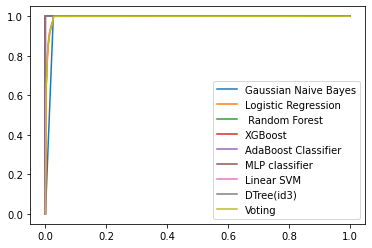

The ROC-AUC curve for UNSW dataset for k = 30 features after oversampler


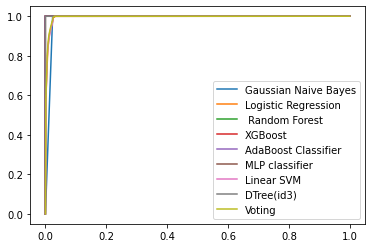

The ROC-AUC curve for UNSW dataset for k = 25 features after oversampler


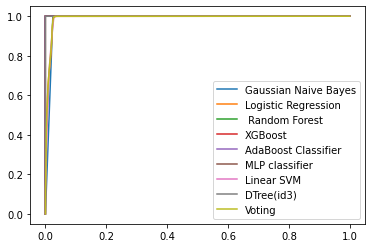

In [ ]:
k=[40,30,25]
for j in k:
  print(f"The ROC-AUC curve for UNSW dataset for k = {j} features after oversampler")
  temp_list=roc_auc_UNSW[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

CSIDS dataset

The ROC-AUC curve for CSIDS dataset for k = 70 features after oversampler


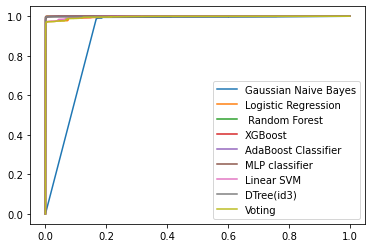

The ROC-AUC curve for CSIDS dataset for k = 60 features after oversampler


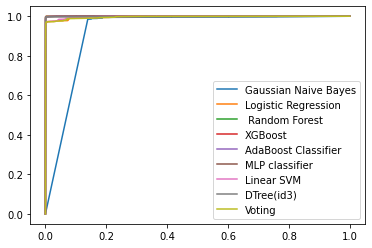

The ROC-AUC curve for CSIDS dataset for k = 50 features after oversampler


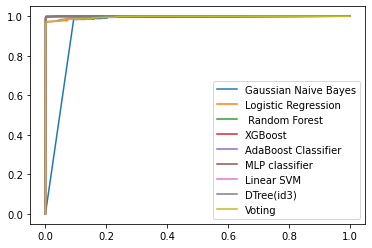

In [ ]:
k=[70,60,50]
for j in k:
  print(f"The ROC-AUC curve for CSIDS dataset for k = {j} features after oversampler")
  temp_list=roc_auc_CSIDS[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

### Random undersampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)

for key,val in UNSW_dict_copy.items():
  val[0],a=rus.fit_resample(val[0],Y_train_UNSW_copy)
  val.append(a)

for key,val in CSIDS_dict_copy.items():
  val[0],a=rus.fit_resample(val[0],Y_train_CSIDS_copy)
  val.append(a)

k=[40,30,25]
roc_auc_UNSW=dict(zip(k, ([] for _ in k)))
k=[70,60,50]
roc_auc_CSIDS=dict(zip(k, ([] for _ in k)))

#### Guassian Naive Bayes

In [ ]:
model = GaussianNB()  
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model Gaussian Naive Bayes for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[201725  13233]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    214958
           1       0.59      1.00      0.74     19318

    accuracy                           0.94    234276
   macro avg       0.80      0.97      0.86    234276
weighted avg       0.97      0.94      0.95    234276

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[203370  11588]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    214958
           1       0.63      1.00      0.77     19318

    accuracy                           0.95    234276
   macro avg       0.81      0.97      0.87    234276
weighted avg       0.97      0.95  

In [ ]:
model = GaussianNB()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model Gaussian Naive Bayes for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[91239 21539]
 [  227 39198]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    112778
           1       0.65      0.99      0.78     39425

    accuracy                           0.86    152203
   macro avg       0.82      0.90      0.84    152203
weighted avg       0.91      0.86      0.86    152203

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[93913 18865]
 [  453 38972]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91    112778
           1       0.67      0.99      0.80     39425

    accuracy                           0.87    152203
   macro avg       0.83      0.91      0.85    152203
weighted avg       0.91      0.87      0.

#### LogosticRegression

In [ ]:
model=LogisticRegression()

for key,val in UNSW_dict_copy.items():
  print(f"fitting the model Logistic Regression for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Logistic Regression for UNSW dataset with k = 40 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209389   5569]
 [    97  19221]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.78      0.99      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 30 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209388   5570]
 [   100  19218]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.78      0.99      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 25 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208135   6823]
 [    27  19291]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.74      1.00      0.85     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = LogisticRegression()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model LogisticRegression for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LogisticRegression for CSIDS dataset with k = 70 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106513   6265]
 [   944  38481]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    112778
           1       0.86      0.98      0.91     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.95    152203

fitting the model LogisticRegression for CSIDS dataset with k = 60 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106486   6292]
 [   929  38496]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    112778
           1       0.86      0.98      0.91     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.95    152203

fitting the model LogisticRegression for CSIDS dataset with k = 50 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106587   6191]
 [   943  38482]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.86      0.98      0.92     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.95    152203



#### RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model RandomForestClassifier for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model RandomForestClassifier for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[214930     28]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model RandomForestClassifier for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[214942     16]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.

In [ ]:
model = RandomForestClassifier()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model RandomForestClassifier for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model RandomForestClassifier for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[112594    184]
 [   114  39311]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model RandomForestClassifier for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[112599    179]
 [   110  39315]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      

#### XGBClassifier

In [ ]:
model=XGBClassifier()
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model XGBClassifier for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model XGBClassifier for UNSW dataset with k = 40 features after applying UnderSampler
[17:24:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confusion matrix and classification report
[[214951      7]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 30 features after applying UnderSampler
[17:24:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confusion matrix and classification report
[[214948     10]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 25 features after applying UnderSampler
[17:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confusion matrix and classification report
[[214948     10]
 [     1  19317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = XGBClassifier()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model XGBClassifier for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model XGBClassifier for CSIDS dataset with k = 70 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112591    187]
 [    61  39364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 60 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112595    183]
 [    66  39359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 50 features after applying UnderSampler
[17:24:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


confusion matrix and classification report
[[112600    178]
 [    70  39355]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



#### AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier()
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model AdaBoostClassifier for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model AdaBoostClassifier for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model AdaBoostClassifier for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      

In [ ]:
model = AdaBoostClassifier()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model AdaBoostClassifier for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model AdaBoostClassifier for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[112371    407]
 [   126  39299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model AdaBoostClassifier for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[112234    544]
 [   134  39291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      0.99    152203
weighted avg       1.00      1.00    

#### MLPClassifier

In [ ]:
model=MLPClassifier()
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model MLPClassifier for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model MLPClassifier for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[214941     17]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model MLPClassifier for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[214930     28]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    23

In [ ]:
model = MLPClassifier()  
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model MLPClassifier for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model MLPClassifier for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[112504    274]
 [   260  39165]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model MLPClassifier for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[111749   1029]
 [   115  39310]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    112778
           1       0.97      1.00      0.99     39425

    accuracy                           0.99    152203
   macro avg       0.99      0.99      0.99    152203
weighted avg       0.99      0.99      0.99    

#### Linear SVC

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model SVM for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model SVM for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[209273   5685]
 [    82  19236]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model SVM for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[209349   5609]
 [    91  19227]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the mo

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model SVM for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model SVM for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[104795   7983]
 [   612  38813]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    112778
           1       0.83      0.98      0.90     39425

    accuracy                           0.94    152203
   macro avg       0.91      0.96      0.93    152203
weighted avg       0.95      0.94      0.94    152203

fitting the model SVM for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[104797   7981]
 [   612  38813]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    112778
           1       0.83      0.98      0.90     39425

    accuracy                           0.94    152203
   macro avg       0.91      0.96      0.93    152203
weighted avg       0.95      0.94      0.95    152203

fitting the 

#### Decision Tree ID3

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model Id3Estimator for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Id3Estimator for UNSW dataset with k = 40 features after applying UnderSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model Id3Estimator for UNSW dataset with k = 30 features after applying UnderSampler
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    2342

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model Id3Estimator for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Id3Estimator for CSIDS dataset with k = 70 features after applying UnderSampler
confusion matrix and classification report
[[112576    202]
 [    76  39349]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model Id3Estimator for CSIDS dataset with k = 60 features after applying UnderSampler
confusion matrix and classification report
[[112576    202]
 [    75  39350]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    15

#### Voting Classifier

In [ ]:
clf1=GaussianNB()
clf2 = LogisticRegression()
clf=LinearSVC()
clf3 = CalibratedClassifierCV(clf) 

model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in UNSW_dict_copy.items():
  print(f"fitting the model voting classifier for UNSW dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model voting classifier for UNSW dataset with k = 40 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208774   6184]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.76      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.99      0.92    234276
weighted avg       0.98      0.97      0.98    234276

fitting the model voting classifier for UNSW dataset with k = 30 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208776   6182]
 [    39  19279]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.76      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.98      0.92    234276
weighted avg       0.98      0.97      0.98    234276

fitting the model voting classifier for UNSW dataset with k = 25 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208390   6568]
 [    16  19302]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.85     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in CSIDS_dict_copy.items():
  print(f"fitting the model voting classifier for CSIDS dataset with k = {key} features after applying UnderSampler")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model voting classifier for CSIDS dataset with k = 70 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[101977  10801]
 [   469  38956]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 60 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[102001  10777]
 [   470  38955]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 50 features after applying UnderSampler


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[102826   9952]
 [   606  38819]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    112778
           1       0.80      0.98      0.88     39425

    accuracy                           0.93    152203
   macro avg       0.90      0.95      0.92    152203
weighted avg       0.94      0.93      0.93    152203



#### ROC - AUC CURVE

UNSW dataset

The ROC-AUC curve for UNSW dataset for k = 40 features after Undersampler


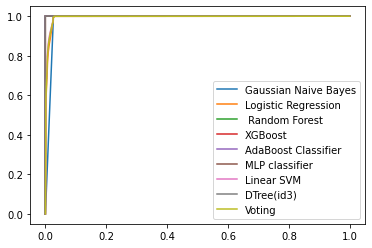

The ROC-AUC curve for UNSW dataset for k = 30 features after Undersampler


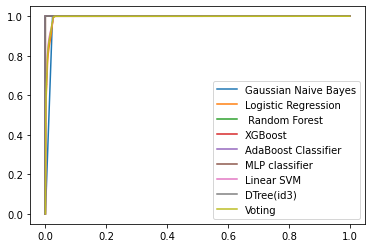

The ROC-AUC curve for UNSW dataset for k = 25 features after Undersampler


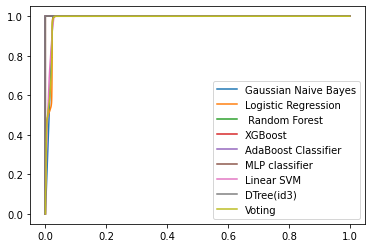

In [ ]:
k=[40,30,25]
for j in k:
  print(f"The ROC-AUC curve for UNSW dataset for k = {j} features after Undersampler")
  temp_list=roc_auc_UNSW[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

CSIDS dataset

The ROC-AUC curve for CSIDS dataset for k = 70 features after Undersampler


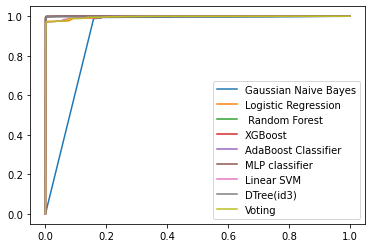

The ROC-AUC curve for CSIDS dataset for k = 60 features after Undersampler


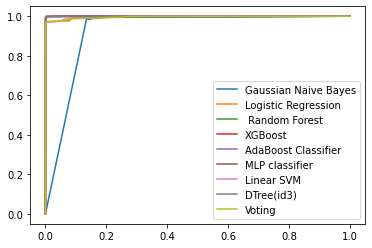

The ROC-AUC curve for CSIDS dataset for k = 50 features after Undersampler


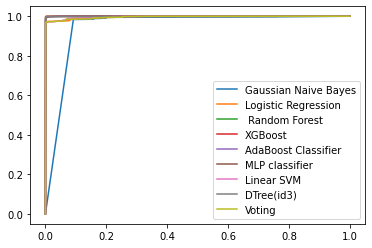

In [ ]:
k=[70,60,50]
for j in k:
  print(f"The ROC-AUC curve for CSIDS dataset for k = {j} features after Undersampler")
  temp_list=roc_auc_CSIDS[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
for key,val in UNSW_dict_copy1.items():
  val[0],a=sm.fit_resample(val[0],Y_train_UNSW_copy1)
  val.append(a)

for key,val in CSIDS_dict_copy1.items():
  val[0],a=sm.fit_resample(val[0],Y_train_CSIDS_copy1)
  val.append(a)

k=[40,30,25]
roc_auc_UNSW=dict(zip(k, ([] for _ in k)))
k=[70,60,50]
roc_auc_CSIDS=dict(zip(k, ([] for _ in k)))

#### GaussianNB

In [ ]:
model = GaussianNB()  
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model Gaussian Naive Bayes for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[202400  12558]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    214958
           1       0.61      1.00      0.75     19318

    accuracy                           0.95    234276
   macro avg       0.80      0.97      0.86    234276
weighted avg       0.97      0.95      0.95    234276

fitting the model Gaussian Naive Bayes for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[203403  11555]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    214958
           1       0.63      1.00      0.77     19318

    accuracy                           0.95    234276
   macro avg       0.81      0.97      0.87    234276
weighted avg       0.97      0.95      0.96    23

In [ ]:
model = GaussianNB()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model Gaussian Naive Bayes for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[89067 23711]
 [  226 39199]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    112778
           1       0.62      0.99      0.77     39425

    accuracy                           0.84    152203
   macro avg       0.81      0.89      0.82    152203
weighted avg       0.90      0.84      0.85    152203

fitting the model Gaussian Naive Bayes for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[93433 19345]
 [  389 39036]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    112778
           1       0.67      0.99      0.80     39425

    accuracy                           0.87    152203
   macro avg       0.83      0.91      0.85    152203
weighted avg       0.91      0.87      0.88    152203



#### LogisticRegression

In [ ]:
model=LogisticRegression()

for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model Logistic Regression for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Logistic Regression for UNSW dataset with k = 40 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209297   5661]
 [    79  19239]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 30 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[209295   5663]
 [   101  19217]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      0.99      0.87     19318

    accuracy                           0.98    234276
   macro avg       0.89      0.98      0.93    234276
weighted avg       0.98      0.98      0.98    234276

fitting the model Logistic Regression for UNSW dataset with k = 25 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208377   6581]
 [    30  19288]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.85     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = LogisticRegression()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model LogisticRegression for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LogisticRegression for CSIDS dataset with k = 70 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106868   5910]
 [   896  38529]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.87      0.98      0.92     39425

    accuracy                           0.96    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.96      0.96    152203

fitting the model LogisticRegression for CSIDS dataset with k = 60 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[107287   5491]
 [   897  38528]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.88      0.98      0.92     39425

    accuracy                           0.96    152203
   macro avg       0.93      0.96      0.95    152203
weighted avg       0.96      0.96      0.96    152203

fitting the model LogisticRegression for CSIDS dataset with k = 50 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[107891   4887]
 [   903  38522]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    112778
           1       0.89      0.98      0.93     39425

    accuracy                           0.96    152203
   macro avg       0.94      0.97      0.95    152203
weighted avg       0.96      0.96      0.96    152203



#### RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model RandomForestClassifier for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model RandomForestClassifier for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[214957      1]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model RandomForestClassifier for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00  

In [ ]:
model = RandomForestClassifier()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model RandomForestClassifier for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model RandomForestClassifier for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[112659    119]
 [   147  39278]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model RandomForestClassifier for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[112653    125]
 [   138  39287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00

#### XGBClassifier

In [ ]:
model=XGBClassifier()
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model XGBClassifier for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model XGBClassifier for UNSW dataset with k = 40 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 30 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model XGBClassifier for UNSW dataset with k = 25 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = XGBClassifier()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model XGBClassifier for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model XGBClassifier for CSIDS dataset with k = 70 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112630    148]
 [    80  39345]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 60 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112632    146]
 [    82  39343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model XGBClassifier for CSIDS dataset with k = 50 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112636    142]
 [    77  39348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



#### AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier()
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model AdaBoostClassifier for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model AdaBoostClassifier for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model AdaBoostClassifier for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

In [ ]:
model = AdaBoostClassifier()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model AdaBoostClassifier for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))  
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model AdaBoostClassifier for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[112371    407]
 [   151  39274]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model AdaBoostClassifier for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[112447    331]
 [   287  39138]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      0.99      0.99    152203
weighted avg       1.00      1.00      1.00    1522

#### MLPClassifier

In [ ]:
model=MLPClassifier()
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model MLPClassifier for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model MLPClassifier for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[214954      4]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model MLPClassifier for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[214952      6]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting 

In [ ]:
model = MLPClassifier()  
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model MLPClassifier for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model MLPClassifier for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[112682     96]
 [   314  39111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model MLPClassifier for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[112274    504]
 [   109  39316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      1.00      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      1.00      0.99    152203
weighted avg       1.00      1.00      1.00    152203

fittin

#### Linear SVC

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model SVM for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model SVM for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[208902   6056]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.76      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.99      0.93    234276
weighted avg       0.98      0.97      0.98    234276

fitting the model SVM for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[209044   5914]
 [    42  19276]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    214958
           1       0.77      1.00      0.87     19318

    accuracy                           0.97    234276
   macro avg       0.88      0.99      0.93    234276
weighted avg       0.98      0.97      0.98    234276

fitting the model SVM for UN

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model SVM for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model SVM for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[104969   7809]
 [   412  39013]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    112778
           1       0.83      0.99      0.90     39425

    accuracy                           0.95    152203
   macro avg       0.91      0.96      0.93    152203
weighted avg       0.95      0.95      0.95    152203

fitting the model SVM for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[104961   7817]
 [   412  39013]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    112778
           1       0.83      0.99      0.90     39425

    accuracy                           0.95    152203
   macro avg       0.91      0.96      0.93    152203
weighted avg       0.95      0.95      0.95    152203

fitting the model SVM for 

#### Decision Tree ID3

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model Id3Estimator for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Id3Estimator for UNSW dataset with k = 40 features after applying SMOTE
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting the model Id3Estimator for UNSW dataset with k = 30 features after applying SMOTE
confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276

fitting th

In [ ]:
model=DecisionTreeClassifier(criterion="entropy")
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model Id3Estimator for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Id3Estimator for CSIDS dataset with k = 70 features after applying SMOTE
confusion matrix and classification report
[[112633    145]
 [   102  39323]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting the model Id3Estimator for CSIDS dataset with k = 60 features after applying SMOTE
confusion matrix and classification report
[[112640    138]
 [   105  39320]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203

fitting 

#### Voting Classifier

In [ ]:
clf1=GaussianNB()
clf2 = LogisticRegression()
clf=LinearSVC()
clf3 = CalibratedClassifierCV(clf) 

model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in UNSW_dict_copy1.items():
  print(f"fitting the model voting classifier for UNSW dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_UNSW_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
  roc_auc_UNSW[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
  print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model voting classifier for UNSW dataset with k = 40 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208477   6481]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276

fitting the model voting classifier for UNSW dataset with k = 30 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208520   6438]
 [     6  19312]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276

fitting the model voting classifier for UNSW dataset with k = 25 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[208472   6486]
 [    20  19298]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    214958
           1       0.75      1.00      0.86     19318

    accuracy                           0.97    234276
   macro avg       0.87      0.98      0.92    234276
weighted avg       0.98      0.97      0.97    234276



In [ ]:
model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
for key,val in CSIDS_dict_copy1.items():
  print(f"fitting the model voting classifier for CSIDS dataset with k = {key} features after applying SMOTE")
  model.fit(val[0],val[2])
  Y_CSIDS_predict = model.predict(val[1])
  y_pred=model.predict_proba(val[1])[:, 1]
  fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
  roc_auc_CSIDS[key].append((fpr,tpr))
  print("confusion matrix and classification report")
  print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
  print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model voting classifier for CSIDS dataset with k = 70 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[101842  10936]
 [   439  38986]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 60 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[101960  10818]
 [   456  38969]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    112778
           1       0.78      0.99      0.87     39425

    accuracy                           0.93    152203
   macro avg       0.89      0.95      0.91    152203
weighted avg       0.94      0.93      0.93    152203

fitting the model voting classifier for CSIDS dataset with k = 50 features after applying SMOTE


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[102862   9916]
 [   590  38835]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    112778
           1       0.80      0.99      0.88     39425

    accuracy                           0.93    152203
   macro avg       0.90      0.95      0.92    152203
weighted avg       0.94      0.93      0.93    152203



#### ROC-AUC curve

UNSW

The ROC-AUC curve for UNSW dataset for k = 40 features after SMOTE


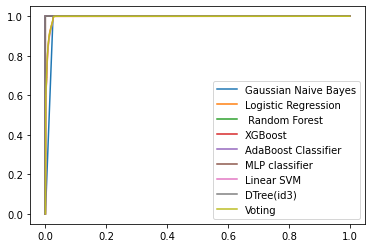

The ROC-AUC curve for UNSW dataset for k = 30 features after SMOTE


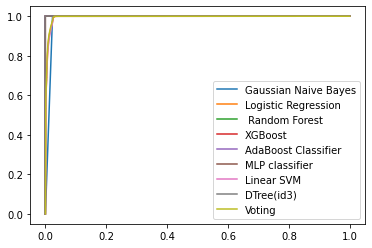

The ROC-AUC curve for UNSW dataset for k = 25 features after SMOTE


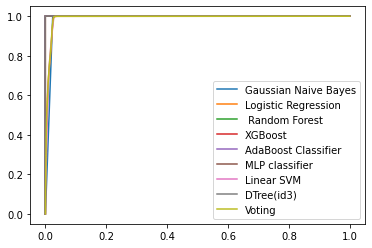

In [ ]:
k=[40,30,25]
for j in k:
  print(f"The ROC-AUC curve for UNSW dataset for k = {j} features after SMOTE")
  temp_list=roc_auc_UNSW[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

CSIDS

The ROC-AUC curve for CSIDS dataset for k = 70 features after SMOTE


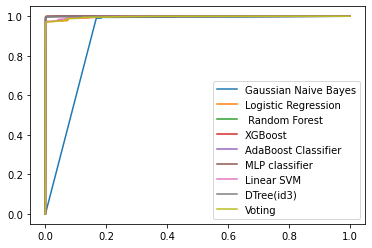

The ROC-AUC curve for CSIDS dataset for k = 60 features after SMOTE


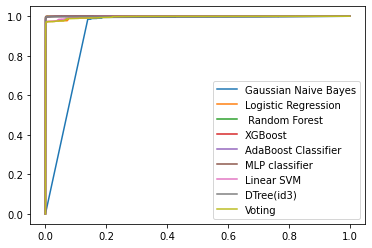

The ROC-AUC curve for CSIDS dataset for k = 50 features after SMOTE


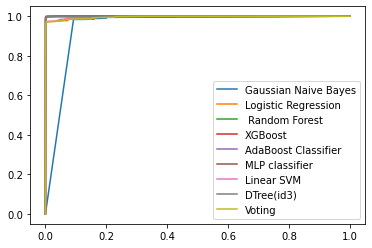

In [ ]:
k=[70,60,50]
for j in k:
  print(f"The ROC-AUC curve for CSIDS dataset for k = {j} features after SMOTE")
  temp_list=roc_auc_CSIDS[j]
  for i in range(0,len(temp_list)):
    x,y=temp_list[i]
    plt.plot(x,y)
  plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
  plt.show()

### Models that were tried on PCA feature selection datasets

In [ ]:
roc_auc_smote_unsw=[]
roc_auc_smote_csids=[]

###### Gaussian Naive Bayes

In [ ]:
model = GaussianNB()  
print(f"fitting the model Gaussian Naive Bayes for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model Gaussian Naive Bayes for UNSW dataset after applying PCA
confusion matrix and classification report
[[202868  12090]
 [  1440  17878]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    214958
           1       0.60      0.93      0.73     19318

    accuracy                           0.94    234276
   macro avg       0.79      0.93      0.85    234276
weighted avg       0.96      0.94      0.95    234276



In [ ]:
model = GaussianNB()  
print(f"fitting the model Gaussian Naive Bayes for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model Gaussian Naive Bayes for CSIDS dataset after applying PCA
confusion matrix and classification report
[[31194 81584]
 [ 1742 37683]]
              precision    recall  f1-score   support

           0       0.95      0.28      0.43    112778
           1       0.32      0.96      0.47     39425

    accuracy                           0.45    152203
   macro avg       0.63      0.62      0.45    152203
weighted avg       0.78      0.45      0.44    152203



###### Logitic Regression

In [ ]:
model = LogisticRegression()  
print(f"fitting the model LogisticRegression classifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model LogisticRegression classifier for UNSW dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[211934   3024]
 [  1248  18070]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.86      0.94      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.93      0.96      0.94    234276
weighted avg       0.98      0.98      0.98    234276



In [ ]:
model = LogisticRegression()  
print(f"fitting the model LogisticRegression for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LogisticRegression for CSIDS dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[109400   3378]
 [  1032  38393]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    112778
           1       0.92      0.97      0.95     39425

    accuracy                           0.97    152203
   macro avg       0.95      0.97      0.96    152203
weighted avg       0.97      0.97      0.97    152203



###### Randomforest Classifier

In [ ]:
model = RandomForestClassifier()  
print(f"fitting the model RandomForestClassifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model RandomForestClassifier for UNSW dataset after applying PCA
confusion matrix and classification report
[[214948     10]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = RandomForestClassifier()  
print(f"fitting the model RandomForestClassifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model RandomForestClassifier for CSIDS dataset after applying PCA
confusion matrix and classification report
[[112684     94]
 [   149  39276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



###### XGBoost

In [ ]:
model = XGBClassifier()  
print(f"fitting the model XGBClassifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model XGBClassifier for UNSW dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:33:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[214951      7]
 [     2  19316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = XGBClassifier()  
print(f"fitting the model XGBClassifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model XGBClassifier for CSIDS dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:36:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix and classification report
[[112730     48]
 [   180  39245]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



###### AdaBoost

In [ ]:
model = AdaBoostClassifier()  
print(f"fitting the model AdaBoostClassifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model AdaBoostClassifier for UNSW dataset after applying PCA
confusion matrix and classification report
[[214621    337]
 [   421  18897]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       0.98      0.98      0.98     19318

    accuracy                           1.00    234276
   macro avg       0.99      0.99      0.99    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = AdaBoostClassifier()  
print(f"fitting the model AdaBoostClassifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model AdaBoostClassifier for CSIDS dataset after applying PCA
confusion matrix and classification report
[[112509    269]
 [   398  39027]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       0.99      0.99      0.99     39425

    accuracy                           1.00    152203
   macro avg       0.99      0.99      0.99    152203
weighted avg       1.00      1.00      1.00    152203



###### MLP Classifier

In [ ]:
model = MLPClassifier()  
print(f"fitting the model MLPClassifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model MLPClassifier for UNSW dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


confusion matrix and classification report
[[214958      0]
 [     0  19318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = MLPClassifier()  
print(f"fitting the model MLPClassifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model MLPClassifier for CSIDS dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


confusion matrix and classification report
[[112491    287]
 [   950  38475]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112778
           1       0.99      0.98      0.98     39425

    accuracy                           0.99    152203
   macro avg       0.99      0.99      0.99    152203
weighted avg       0.99      0.99      0.99    152203



###### Linear SVM

In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf) 
print(f"fitting the LinearSVC for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the LinearSVC for UNSW dataset after applying PCA
confusion matrix and classification report
[[212097   2861]
 [  1481  17837]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    214958
           1       0.86      0.92      0.89     19318

    accuracy                           0.98    234276
   macro avg       0.93      0.96      0.94    234276
weighted avg       0.98      0.98      0.98    234276



In [ ]:
clf=LinearSVC()
model = CalibratedClassifierCV(clf)  
print(f"fitting the model LinearSVC for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model LinearSVC for CSIDS dataset after applying PCA
confusion matrix and classification report
[[110356   2422]
 [  1037  38388]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    112778
           1       0.94      0.97      0.96     39425

    accuracy                           0.98    152203
   macro avg       0.97      0.98      0.97    152203
weighted avg       0.98      0.98      0.98    152203



###### DecisionTree ID3

In [ ]:
model = DecisionTreeClassifier(criterion="entropy") 
print(f"fitting the model DecisionTreeClassifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model DecisionTreeClassifier for UNSW dataset after applying PCA
confusion matrix and classification report
[[214936     22]
 [    34  19284]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    214958
           1       1.00      1.00      1.00     19318

    accuracy                           1.00    234276
   macro avg       1.00      1.00      1.00    234276
weighted avg       1.00      1.00      1.00    234276



In [ ]:
model = DecisionTreeClassifier(criterion="entropy")
print(f"fitting the model DecisionTreeClassifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model DecisionTreeClassifier for CSIDS dataset after applying PCA
confusion matrix and classification report
[[112631    147]
 [   131  39294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    112778
           1       1.00      1.00      1.00     39425

    accuracy                           1.00    152203
   macro avg       1.00      1.00      1.00    152203
weighted avg       1.00      1.00      1.00    152203



###### Voting Classifier

In [ ]:
clf1=GaussianNB()
clf2 = LogisticRegression()
clf=LinearSVC()
clf3 = CalibratedClassifierCV(clf) 

model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
print(f"fitting the model voting classifier for UNSW dataset after applying PCA")
model.fit(X_train_pca_UNSW,Y_train_pca_UNSW_copy)
Y_UNSW_predict = model.predict(X_test_pca_UNSW)
y_pred=model.predict_proba(X_test_pca_UNSW)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_UNSW, y_pred)
roc_auc_smote_unsw.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_UNSW,Y_UNSW_predict))
print(classification_report(Y_test_UNSW, Y_UNSW_predict))

fitting the model voting classifier for UNSW dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[212543   2415]
 [   683  18635]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    214958
           1       0.89      0.96      0.92     19318

    accuracy                           0.99    234276
   macro avg       0.94      0.98      0.96    234276
weighted avg       0.99      0.99      0.99    234276



In [ ]:
model = VotingClassifier(estimators=[('gnb', clf1), ('lr', clf2), ('linearsvc', clf3)], voting='soft')
print(f"fitting the model voting classifier for CSIDS dataset after applying PCA")
model.fit(X_train_pca_CSIDS,Y_train_pca_CSIDS_copy)
Y_CSIDS_predict = model.predict(X_test_pca_CSIDS)
y_pred=model.predict_proba(X_test_pca_CSIDS)[:, 1]
fpr, tpr, thres = metrics.roc_curve(Y_test_CSIDS, y_pred)
roc_auc_smote_csids.append((fpr,tpr))
print("confusion matrix and classification report")
print(confusion_matrix(Y_test_CSIDS,Y_CSIDS_predict))
print(classification_report(Y_test_CSIDS, Y_CSIDS_predict))

fitting the model voting classifier for CSIDS dataset after applying PCA


/home/cs19btech11012/anaconda3/envs/avalanche-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


confusion matrix and classification report
[[106812   5966]
 [   943  38482]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    112778
           1       0.87      0.98      0.92     39425

    accuracy                           0.95    152203
   macro avg       0.93      0.96      0.94    152203
weighted avg       0.96      0.95      0.96    152203



##### ROC-AUC curves 

###### UNSW

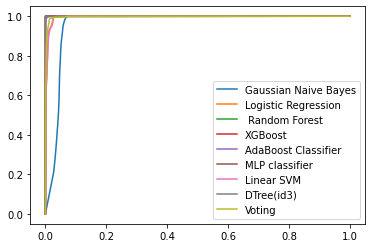

In [ ]:
for i in range(0,len(roc_auc_smote_unsw)):
    x,y=roc_auc_smote_unsw[i]
    plt.plot(x,y)
plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
plt.show()

###### CSIDS

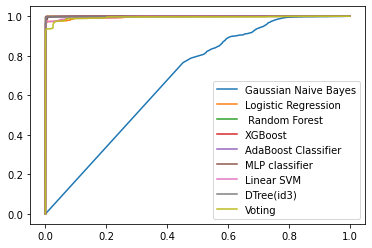

In [ ]:
for i in range(0,len(roc_auc_smote_csids)):
    x,y=roc_auc_smote_csids[i]
    plt.plot(x,y)
plt.legend(("Gaussian Naive Bayes","Logistic Regression"," Random Forest","XGBoost","AdaBoost Classifier","MLP classifier","Linear SVM","DTree(id3)","Voting"))
plt.show()